In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

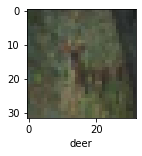

In [10]:
plot_sample(x_train, y_train, 10)

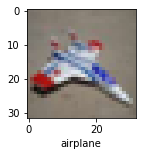

In [12]:
plot_sample(x_train, y_train, 30)

In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4342 - accuracy: 0.4840
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0658 - accuracy: 0.6288
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9341 - accuracy: 0.6754
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8508 - accuracy: 0.7031
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7833 - accuracy: 0.7280
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7328 - accuracy: 0.7439
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6790 - accuracy: 0.7618
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6346 - accuracy: 0.7794
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.5898 - accuracy: 0.7931
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [17]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9673 - accuracy: 0.7004


[0.9672858119010925, 0.7003999948501587]